# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Safira Rahmalia Putri]
- **Email:** [M296B4KX4003@bangkit.academy]
- **ID Dicoding:** [safirahmalia]

## Menentukan Pertanyaan Bisnis

- Which season has the highest total bike rentals?
- What are the peak hours for bike rentals on weekdays compared to weekends?

## Import Semua Packages/Library yang Digunakan

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Data yang digunakan adalah data dari **hour.csv**

In [82]:
bike_data = pd.read_csv('/content/hour.csv')
bike_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dataset ini berisi data historis penyewaan sepeda dari sistem Capital Bikeshare di Washington D.C. selama tahun 2011 dan 2012, termasuk data cuaca seperti suhu, kelembapan, dan kecepatan angin.
- Variabel-variabel dalam dataset mencakup **season** (musim), **yr** (tahun), **mnth** (bulan), **hr** (jam), **holiday** (hari libur), **weekday** (hari dalam seminggu), **workingday** (hari kerja), **weathersit** (kondisi cuaca), **temp** (suhu), **hum** (kelembapan), **windspeed** (kecepatan angin), **casual** (penyewa kasual), **registered** (penyewa terdaftar), dan **cnt** (total penyewaan).

### Assessing Data

Menilai dataset

In [83]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [84]:
bike_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [85]:
print("Jumlah duplikasi: ", bike_data.duplicated().sum())

Jumlah duplikasi:  0


In [86]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

Pengecekan hour_data

In [87]:
bike_data.duplicated().sum()

0

In [88]:
bike_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [90]:
## Mengubah format beberapa variabel
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])
bike_data['season'] = bike_data['season'].astype('category')
bike_data['weathersit'] = bike_data['weathersit'].astype('category')
bike_data['hr'] = bike_data['hr'].astype('category')
bike_data['weekday'] = bike_data['weekday'].astype('category')
bike_data['workingday'] = bike_data['workingday'].astype('category')

Pengubahan format beberapa variabel dalam dataset `bike_data` bertujuan untuk mempermudah analisis. Kolom `dteday` diubah ke format datetime agar analisis waktu seperti pengelompokan berdasarkan tahun atau bulan dapat dilakukan dengan lebih efisien. Sementara itu, kolom-kolom seperti `season`, `weathersit`, `hr`, `weekday`, dan `workingday` diubah menjadi tipe kategori untuk menghemat memori dan meningkatkan kecepatan proses. Tipe kategori juga memudahkan analisis dan visualisasi data, sehingga memungkinkan teknik analisis yang lebih tepat dan efektif."""


In [91]:
# Mengganti nilai di kolom 'season', 'yr', 'mnth', 'weekday', 'workingday', 'holiday', dan 'weathersit'
bike_data['season'] = bike_data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_data['yr'] = bike_data['yr'].map({0: 2011, 1: 2012})
bike_data['mnth'] = bike_data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
                                             6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',
                                             10: 'Oct', 11: 'Nov', 12: 'Dec'})
bike_data['weekday'] = bike_data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                                                  3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
bike_data['workingday'] = bike_data['workingday'].map({0: 'No', 1: 'Yes'})
bike_data['holiday'] = bike_data['holiday'].map({0: 'No', 1: 'Yes'})
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'})

Penggantian nilai di kolom-kolom seperti `season`, `yr`, `mnth`, `weekday`, `workingday`, `holiday`, dan `weathersit` pada dataset `bike_data` bertujuan untuk membuat data lebih mudah dipahami. Dengan mengganti angka menjadi istilah yang deskriptif, pengguna dapat dengan cepat mengerti makna setiap variabel.

Misalnya, mengubah angka menjadi nama musim seperti 'Spring', 'Summer', 'Fall', dan 'Winter' mempermudah analisis dan visualisasi data, sehingga informasi yang diperoleh lebih jelas dan informatif.
"""

In [92]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [93]:
bike_data.describe()

,instant,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [94]:
# Menghapus outliers menggunakan metode IQR
Q1 = bike_data['temp'].quantile(0.25)
Q3 = bike_data['temp'].quantile(0.75)
IQR = Q3 - Q1

bike_data = bike_data[~((bike_data['temp'] < (Q1 - 1.5 * IQR)) | (bike_data['temp'] > (Q3 + 1.5 * IQR)))]
bike_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Dec,19,No,Monday,Yes,Misty,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,2012,Dec,20,No,Monday,Yes,Misty,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,2012,Dec,21,No,Monday,Yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,2012,Dec,22,No,Monday,Yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


Penghapusan outliers menggunakan metode IQR penting untuk menjaga akurasi analisis data. Karena outliers dapat mengganggu pemahaman pola dan tren dalam dataset.

**Insight:**
- Berikut adalah beberapa insights sederhana yang diperoleh dari data:

1. **Jumlah Total Data**: Terdapat 17,379 entri dalam dataset, yang mencakup berbagai informasi terkait penyewaan sepeda, seperti waktu dan kondisi cuaca.

2. **Rata-rata Penyewaan**: Rata-rata total penyewaan sepeda per jam adalah sekitar 189, dengan jumlah penyewaan berkisar dari 1 hingga 977, menunjukkan variasi yang signifikan dalam permintaan.

3. **Penghapusan Outliers**: Proses penghapusan outliers pada kolom suhu meningkatkan akurasi analisis, memastikan bahwa data tidak terdistorsi oleh nilai ekstrem yang dapat mempengaruhi hasil.


## Exploratory Data Analysis (EDA)

### Explore ...

In [95]:
bike_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5227,5228,2011-08-10,Fall,2011,Aug,17,No,Wednesday,Yes,Clear,0.84,0.7121,0.26,0.2985,71,513,584
12153,12154,2012-05-26,Summer,2012,May,14,No,Saturday,No,Clear,0.76,0.7273,0.66,0.2239,307,257,564
10977,10978,2012-04-07,Summer,2012,Apr,13,No,Saturday,No,Clear,0.50,0.4848,0.22,0.1940,355,288,643
2581,2582,2011-04-22,Summer,2011,Apr,11,No,Friday,Yes,Light_rainsnow,0.34,0.3333,0.66,0.1940,23,83,106
5215,5216,2011-08-10,Fall,2011,Aug,5,No,Wednesday,Yes,Clear,0.68,0.6364,0.61,0.0896,2,30,32


In [96]:
bike_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.0,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,24.0,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,17.0,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,730.0,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [97]:
bike_data.dteday.is_unique

False

In [98]:
bike_data.groupby(by='season').agg({
      "cnt" : ["sum","mean"]
    })

<ipython-input-98-85db2237d4c2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_data.groupby(by='season').agg({


cnt            
            sum        mean
season                     
Spring   471348  111.114569
Summer   918589  208.344069
Fall    1061129  236.016237
Winter   841613  198.868856

Kode tersebut digunakan untuk menghitung total dan rata-rata sewa sepeda per musim. Ini membantu memahami pola sewa sepeda di setiap musim untuk pengambilan keputusan yang lebih baik."""

In [99]:
bike_data.groupby('season')['cnt'].describe()

<ipython-input-99-76bd24f74f51>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_data.groupby('season')['cnt'].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Spring,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0
Summer,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
Fall,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
Winter,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0


Kemudian, kode di atas digunakan untuk memberikan ringkasan statistik jumlah sewa sepeda berdasarkan musim. Ini membantu memahami seberapa banyak sepeda disewa di setiap musim.

In [100]:
bike_data['day_type'] = bike_data['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')
peak_hours = bike_data.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()
peak_hours

<ipython-input-100-a8b32f0f3ead>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_hours = bike_data.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()


,hr,day_type,cnt
0,0,Weekday,53.898072
1,1,Weekday,33.375691
2,2,Weekday,22.869930
3,3,Weekday,11.727403
4,4,Weekday,6.352941
5,5,Weekday,19.889819
6,6,Weekday,76.044138
7,7,Weekday,212.064649
8,8,Weekday,359.011004
9,9,Weekday,219.309491


Kode tersebut digunakan untuk membedakan hari kerja dan akhir pekan. Dengan mengklasifikasikan hari dalam minggu, kode ini menghitung rata-rata sewa sepeda berdasarkan jam untuk hari kerja dan akhir pekan. Tujuannya adalah untuk mengetahui jam-jam puncak sewa sepeda di kedua kategori tersebut."""

In [101]:
total_bike_rentals = bike_data.groupby('dteday')['cnt'].describe()
total_bike_rentals

,count,mean,std,min,25%,50%,75%,max
dteday,,,,,,,,
2011-01-01,24.0,41.041667,34.292196,1.0,13.75,35.5,58.75,110.0
2011-01-02,23.0,34.826087,29.785067,1.0,8.50,22.0,62.00,93.0
2011-01-03,22.0,61.318182,48.792453,1.0,22.50,56.5,76.75,157.0
2011-01-04,23.0,67.913043,59.889985,1.0,23.00,57.0,95.50,212.0
2011-01-05,23.0,69.565217,58.427753,2.0,26.00,62.0,89.00,195.0
...,...,...,...,...,...,...,...,...
2012-12-27,24.0,88.083333,72.027722,1.0,22.25,90.5,119.25,257.0
2012-12-28,24.0,128.958333,95.264154,2.0,44.50,120.0,222.00,271.0
2012-12-29,24.0,55.875000,41.957859,3.0,24.25,46.5,87.25,147.0


Kode ini berfungsi untuk menghitung statistik deskriptif mengenai jumlah penyewaan sepeda berdasarkan tanggal. Dengan mengelompokkan data menurut `dteday`, kode ini memberikan informasi seperti nilai maksimum, minimum, rata-rata, dan deviasi standar dari jumlah sewa untuk setiap hari. Dengan demikian, hasilnya memberikan pemahaman mengenai pola sewa sepeda selama periode waktu tertentu.

**Insight:**
- **Musim**: Penyewaan tertinggi terjadi pada musim gugur (Fall) dengan rata-rata 236 penyewaan per hari, diikuti musim panas (Summer) dengan 208.
- **Hari dan Jam**: Hari kerja lebih banyak penyewaan dibandingkan akhir pekan, dengan puncak penyewaan terjadi pada jam 17.00 mencapai 461 penyewaan.
- **Variasi Harian**: Rata-rata penyewaan per hari menunjukkan fluktuasi, dipengaruhi oleh faktor seperti cuaca atau acara tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [102]:
season_totals = bike_data.groupby('season', as_index=False)['cnt'].sum()
season_totals

<ipython-input-102-7b2d585dc2a8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_totals = bike_data.groupby('season', as_index=False)['cnt'].sum()


,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

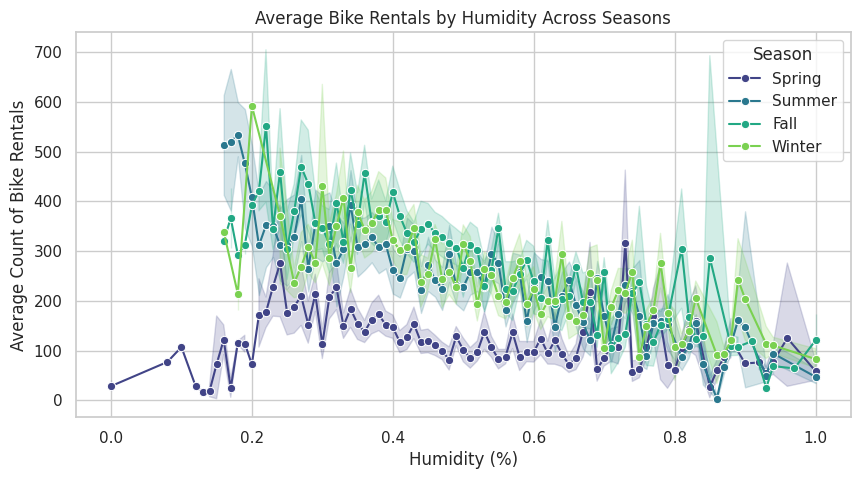

<ipython-input-103-a263e630fdab>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_totals, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

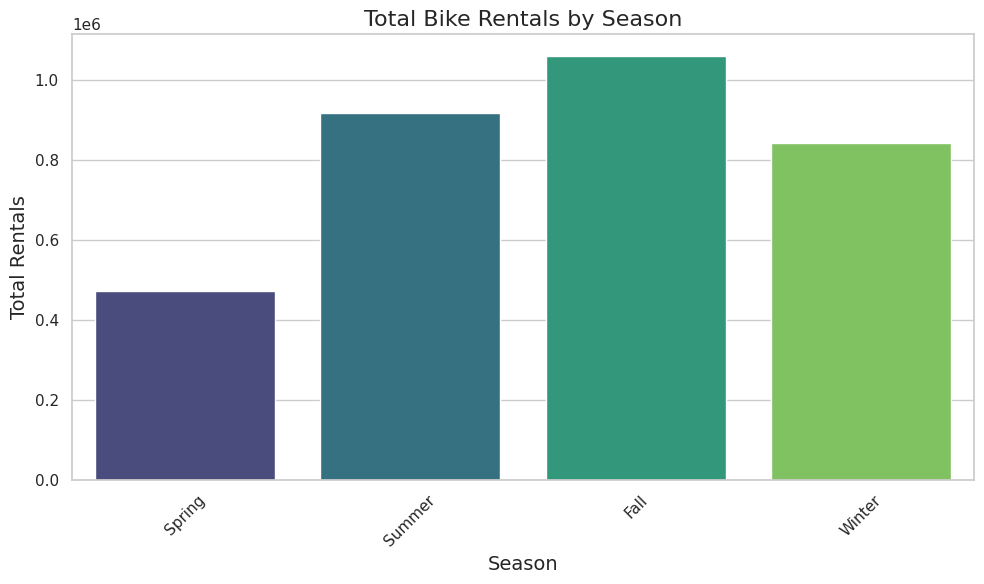

In [103]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=bike_data, x='hum', y='cnt', hue='season', palette='viridis', marker='o')
plt.title('Average Bike Rentals by Humidity Across Seasons')
plt.xlabel('Humidity (%)')
plt.ylabel('Average Count of Bike Rentals')
plt.legend(title='Season')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_totals, palette='viridis')
plt.title('Total Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bar chart dipilih karena memudahkan perbandingan jumlah penyewaan antar musim secara jelas dan informatif. Dengan pengaturan ukuran, judul, dan palet warna yang menarik, grafik menjadi lebih mudah dibaca

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


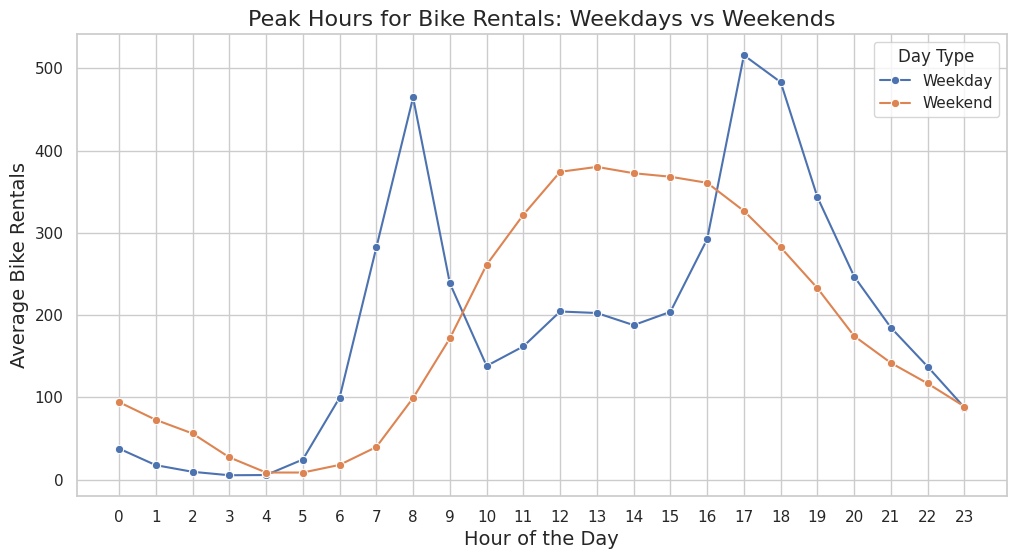

In [110]:
peak_hours = bike_data.groupby(['hr', 'day_type'], as_index=False)['cnt'].mean()

# Plot the results
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Use a line plot to compare weekday vs weekend rentals
sns.lineplot(data=peak_hours, x='hr', y='cnt', hue='day_type', marker='o')

plt.title('Peak Hours for Bike Rentals: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Bike Rentals', fontsize=14)
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.grid(True)
plt.show()


Dengan memisahkan data berdasarkan jenis hari, grafik ini memudahkan analisis pola penyewaan sepeda sepanjang hari. Pengaturan ukuran, judul, dan marker membantu menjelaskan informasi secara efektif, sehingga memudahkan pemahaman perbedaan penyewaan antara weekday dan weekend.

**Insight:**
- **Total Penyewaan Musiman**: Fall season memiliki total penyewaan tertinggi (1.061.129), diikuti oleh summer season, sementara spring season memiliki penyewaan terendah, menunjukkan pengaruh signifikan musim terhadap penyewaan sepeda.
- **Pola Penyewaan Berdasarkan Jam**: Grafik menunjukkan puncak penyewaan terjadi antara pukul 17:00 dan 18:00 dengan 461,45 penyewaan, sementara dini hari memiliki jumlah penyewaan terendah, menandakan bahwa waktu dalam sehari masih mempengaruhi aktivitas penyewaan.

## Analisis Lanjutan (Opsional)

In [105]:
# Calculate total rentals by season
seasonal_rentals = bike_data.groupby('season')['cnt'].sum().reset_index()
seasonal_rentals.columns = ['season', 'Total Rentals']  # Ensure consistent column name

# Calculate peak hour rentals by season
peak_hours_season = bike_data.groupby(['hr', 'season'])['cnt'].mean().reset_index()

# Debugging: Display the structure of both DataFrames
print("Seasonal Rentals DataFrame:")
print(seasonal_rentals.head())
print("\nPeak Hours by Season DataFrame:")
print(peak_hours_season.head())

# Merging the seasonal rentals and peak hours data
merged_analysis = peak_hours_season.merge(seasonal_rentals, on='season', how='left')

# Displaying the results
print("\nMerged Analysis of Peak Hours and Total Rentals by Season:")
print(merged_analysis)

Seasonal Rentals DataFrame:
   season  Total Rentals
0  Spring         471348
1  Summer         918589
2    Fall        1061129
3  Winter         841613

Peak Hours by Season DataFrame:
  hr  season        cnt
0  0  Spring  27.404494
1  0  Summer  56.842391
2  0    Fall  73.914439
3  0  Winter  56.333333
4  1  Spring  18.140449

Merged Analysis of Peak Hours and Total Rentals by Season:
    hr  season         cnt  Total Rentals
0    0  Spring   27.404494         471348
1    0  Summer   56.842391         918589
2    0    Fall   73.914439        1061129
3    0  Winter   56.333333         841613
4    1  Spring   18.140449         471348
..  ..     ...         ...            ...
91  22  Winter  123.564972         841613
92  23  Spring   44.411111         471348
93  23  Summer   95.983696         918589
94  23    Fall  122.919786        1061129
95  23  Winter   86.440678         841613

[96 rows x 4 columns]


<ipython-input-105-342d998ba145>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = bike_data.groupby('season')['cnt'].sum().reset_index()
<ipython-input-105-342d998ba145>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_hours_season = bike_data.groupby(['hr', 'season'])['cnt'].mean().reset_index()


Analisis ini dilakukan untuk mengetahui berapa banyak sepeda yang disewa setiap musim dan jam sibuknya. Dengan menggabungkan data penyewaan musiman dan jam puncak, sehingga bisa diperoleh informasi yang lebih jelas tentang pola penggunaan sepeda.

## Conclusion

- Conclution pertanyaan 1
**Musim Mempengaruhi Penyewaan**: Penyewaan sepeda tertinggi terjadi di **fall season** (1.061.129), sedangkan **spring season** memiliki jumlah penyewaan terendah, menunjukkan bahwa cuaca dan musim sangat berpengaruh terhadap perilaku penyewaan.

- Conclution pertanyaan 2
**Jam Puncak Penyewaan**: Puncak penyewaan sepeda terjadi antara pukul 17:00 dan 18:00 pada hari kerja, menandakan bahwa waktu sehari, terutama jam pulang kerja, mempengaruhi aktivitas penyewaan sepeda.